In [1]:
import pandas as pd
import numpy as np

### 데이터 프레임의 결합
    - 단순하게 결합 (유니언 결합)
        - 단순하게 행을 추가하거나, 열을 추가하여 데이터 프레임을 결합
        - concat()이라는 함수를 사용하여 데이터프레임을 결합
        - 매개변수 axis : 행을 결합할것인지 열을 결합할것인지 지정
        - 매개변수 ignore_index : 데이터 프레임을 결합한뒤 인덱스를 초기화할 것인지 지정
    - 특정 조건에 맞게 데이터를 결합 (조인 결합)
        - 데이터 프레임의 특정한 조건이 참이면 데이터를 결합하는 형태
        - 열을 추가하는 함수로 marge()
        - 매개변수 on : 특정한 조건 지정 
        - 매개변수 how : (left, right, inner, outer) 데이터 프레임의 기준을 지정

In [3]:
# 데이터 프레임 지정
df = pd.DataFrame({
    'S1' : [1,2,3,4],
    'S2' : [5,6,7,8]
})
df

,S1,S2
0,1,5
1,2,6
2,3,7
3,4,8


In [4]:
df2 = pd.DataFrame([1,2])
df2

,0
0,1
1,2


In [10]:
# concat() 함수를 이용하여 데이터 프레임을 결합
# 단순하게 행을 추가
# pd.concat([df,df2], axis = 'rows', ignore_index = True)  # axis = 0
pd.concat([df, df2], axis=0).reset_index(drop=True)

,S1,S2,0
0,1.0,5.0,NaN
1,2.0,6.0,NaN
2,3.0,7.0,NaN
3,4.0,8.0,NaN
4,NaN,NaN,1.0
5,NaN,NaN,2.0


In [11]:
df3 = pd.DataFrame({

    'S1' : [1,2]
})
df3

,S1
0,1
1,2


In [12]:
pd.concat([df,df3], axis = 'rows')

,S1,S2
0,1,5.0
1,2,6.0
2,3,7.0
3,4,8.0
0,1,NaN
1,2,NaN


In [13]:
# 단순하게 열을 결합
pd.concat([df, df2], axis=1)

,S1,S2,0
0,1,5,1.0
1,2,6,2.0
2,3,7,NaN
3,4,8,NaN


In [15]:
df2.index = [6,7]
df2

,0
6,1
7,2


In [16]:
# 단순하게 열을 결합
pd.concat([df, df2], axis=1)

,S1,S2,0
0,1.0,5.0,NaN
1,2.0,6.0,NaN
2,3.0,7.0,NaN
3,4.0,8.0,NaN
6,NaN,NaN,1.0
7,NaN,NaN,2.0


In [17]:
pd.concat([df,df3], axis=1)

,S1,S2,S1
0,1,5,1.0
1,2,6,2.0
2,3,7,NaN
3,4,8,NaN


In [20]:
pd.concat([df,df2,df3], axis=1)

,S1,S2,0,S1
0,1.0,5.0,NaN,1.0
1,2.0,6.0,NaN,2.0
2,3.0,7.0,NaN,NaN
3,4.0,8.0,NaN,NaN
6,NaN,NaN,1.0,NaN
7,NaN,NaN,2.0,NaN


In [21]:
# merge()
# 특정한 조건에 맞춰서 열을 추가하는 함수

df = pd.DataFrame({
    'id' : [1,2,3,4,5],
    'item' : ['a', 'b', 'a', 'a', 'b']
})

df2 = pd.DataFrame({
    'id' : [1,4,5,2,3],
    'name' : ['kim', 'lee', 'park', 'choi', 'ha']
})

In [22]:
pd.concat([df,df2], axis=1)

,id,item,id,name
0,1,a,1,kim
1,2,b,4,lee
2,3,a,5,park
3,4,a,2,choi
4,5,b,3,ha


In [23]:
pd.merge(df,df2, on = 'id', how = 'left') # (left, right, inner, outer) 조건 중에서 inner : 두 개의 공집합, full : 두 개의 합집합, SQL에선 outer가 아니라 full

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [24]:
pd.merge(df,df2, on = 'id', how = 'right')

,id,item,name
0,1,a,kim
1,4,a,lee
2,5,b,park
3,2,b,choi
4,3,a,ha


In [25]:
pd.merge(df,df2, on = 'id', how = 'inner')

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [26]:
pd.merge(df,df2, on = 'id', how = 'outer')

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [27]:
df3 = pd.DataFrame({
    'item' : ['a', 'b', 'c'],
    'price' : [100, 200, 300]
})
df3

,item,price
0,a,100
1,b,200
2,c,300


In [28]:
pd.merge(df, df3, on='item', how='left')    # 기준점이 left라 c가 안나옴

,id,item,price
0,1,a,100
1,2,b,200
2,3,a,100
3,4,a,100
4,5,b,200


In [29]:
pd.merge(df, df3, on='item', how='right')    

,id,item,price
0,1.0,a,100
1,3.0,a,100
2,4.0,a,100
3,2.0,b,200
4,5.0,b,200
5,NaN,c,300


In [31]:
df.loc[3, 'item']

'a'

In [32]:
pd.merge(df, df3, on='item', how='left')

,id,item,price
0,1,a,100
1,2,b,200
2,3,a,100
3,4,a,100
4,5,b,200


In [33]:
pd.merge(df, df3, on='item', how='right')

,id,item,price
0,1.0,a,100
1,3.0,a,100
2,4.0,a,100
3,2.0,b,200
4,5.0,b,200
5,NaN,c,300


In [34]:
pd.merge(df, df3, on='item', how='inner')

,id,item,price
0,1,a,100
1,3,a,100
2,4,a,100
3,2,b,200
4,5,b,200


In [35]:
pd.merge(df, df3, on='item', how='outer')

,id,item,price
0,1.0,a,100
1,3.0,a,100
2,4.0,a,100
3,2.0,b,200
4,5.0,b,200
5,NaN,c,300


## 특정한 경로에 있는 파일의 목록 출력

In [3]:
import os 

In [43]:
file_list = os.listdir('../csv/2017/')

In [2]:
import pandas as pd

In [42]:
for i in range(1,13,1):
    a = "%02d"%i
    file = '2017'+a+'_expense_list.csv'
    print(file)

201701_expense_list.csv
201702_expense_list.csv
201703_expense_list.csv
201704_expense_list.csv
201705_expense_list.csv
201706_expense_list.csv
201707_expense_list.csv
201708_expense_list.csv
201709_expense_list.csv
201710_expense_list.csv
201711_expense_list.csv
201712_expense_list.csv


In [55]:
# read_csv() 안에 들어가는 인자값을 생성
# 상대경로 : ../csv/2017/파일명 -> 12개 출력
# 경로에 있는 파일들을 pandas를 이용하여 데이터 프레임으로 불러온다
# concat을 이용하여 단순하게 행을 추가하는 결합
# 결합을 하려면 기준이 되는 데이터 프레임이 존재하여야 한다
# 비어있는 데이터 프레임을 하나 생성

path = '../csv/2017/'

file_list = os.listdir(path)

result = pd.DataFrame()

for i in file_list:
    # print(path+i)
    df = pd.read_csv(path+i)
    result = pd.concat([result, df], axis = 0, ignore_index=True)

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                70132 non-null  int64  
 1   title              70132 non-null  object 
 2   url                70132 non-null  object 
 3   dept_nm_lvl_1      70132 non-null  object 
 4   dept_nm_lvl_2      70074 non-null  object 
 5   dept_nm_lvl_3      61262 non-null  object 
 6   dept_nm_lvl_4      17939 non-null  object 
 7   dept_nm_lvl_5      3474 non-null   object 
 8   exec_yr            70132 non-null  int64  
 9   exec_month         70132 non-null  int64  
 10  expense_budget     3108 non-null   float64
 11  expense_execution  2805 non-null   float64
 12  category           1259 non-null   object 
 13  dept_nm_full       70053 non-null  object 
 14  exec_dt            70132 non-null  object 
 15  exec_loc           69360 non-null  object 
 16  exec_purpose       701

In [56]:
# json의 경우
path2 = '../csv/2019/'

file_list2 = os.listdir(path2)

result2 = pd.DataFrame()

for i in file_list2:
    # print(path+i)
    df2 = pd.read_json(path2+i)
    result2 = pd.concat([result2, df2], axis = 0, ignore_index=True)

result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74207 entries, 0 to 74206
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                74207 non-null  int64  
 1   title              74207 non-null  object 
 2   url                74207 non-null  object 
 3   dept_nm_lvl_1      74207 non-null  object 
 4   dept_nm_lvl_2      74207 non-null  object 
 5   dept_nm_lvl_3      74207 non-null  object 
 6   dept_nm_lvl_4      74207 non-null  object 
 7   dept_nm_lvl_5      74207 non-null  object 
 8   exec_yr            74207 non-null  int64  
 9   exec_month         74207 non-null  int64  
 10  expense_budget     2075 non-null   float64
 11  expense_execution  1598 non-null   float64
 12  category           74028 non-null  object 
 13  dept_nm_full       74207 non-null  object 
 14  exec_dt            74207 non-null  object 
 15  exec_loc           74207 non-null  object 
 16  exec_purpose       742

In [59]:
# xlsx의 경우
path3 = '../csv/2020/'

file_list3 = os.listdir(path3)

result3 = pd.DataFrame()

for i in file_list3:
    # print(path+i)
    df3 = pd.read_excel(path3+i)
    result3 = pd.concat([result3, df3], axis = 0, ignore_index=True)

result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70862 entries, 0 to 70861
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                70862 non-null  int64  
 1   title              70862 non-null  object 
 2   url                70862 non-null  object 
 3   dept_nm_lvl_1      70862 non-null  object 
 4   dept_nm_lvl_2      70862 non-null  object 
 5   dept_nm_lvl_3      55593 non-null  object 
 6   dept_nm_lvl_4      18992 non-null  object 
 7   dept_nm_lvl_5      1601 non-null   object 
 8   exec_yr            70862 non-null  int64  
 9   exec_month         70862 non-null  int64  
 10  expense_budget     1823 non-null   float64
 11  expense_execution  1338 non-null   float64
 12  category           2123 non-null   object 
 13  dept_nm_full       70862 non-null  object 
 14  exec_dt            70862 non-null  object 
 15  exec_loc           70278 non-null  object 
 16  exec_purpose       708

In [66]:
# 함수 생성
file_list = os.listdir("../csv/2022/")
a = '.json'

for i in file_list:
    if i.endswith(a):
        print(i)
  #  if i[-3:] == "csv":
  #      print("csv : ".i)
  #  elif i[-4:] == 'json':
  #      print("json : ".i)

202202_expense_list.json
202203_expense_list.json
202204_expense_list.json
202205_expense_list.json


In [6]:
# 
def list_load(_dir,_end):
    # 매개변수 2개 생성 : _dir -> 파일의 경로, _end -> 파일의 확장자
    if not(_dir.endswith("/")):
        _dir = _dir + "/"
    
    if _end[0] != ".":
        _end = "." + _end
    
    # print(_dir, _end)

    # 파일의 리스트 호출
    file_list = os.listdir(_dir)

    # 비어있는 데이터 프레임 생성
    result = pd.DataFrame()
    # 파일 리스트에서 확장자가 같은 파일들만 결합
    for i in file_list:
        # 파일명의 확장자라는 인자값과 같은 경우
       if i.endswith(_end):
            print(i)
           # 확장자에 따른 read 함수 설정
            if _end == '.csv':
              df = pd.read_csv(_dir+i)
              result = pd.concat([result,df], axis=0, ignore_index=True)
            elif _end == ".json":
               df = pd.read_json(_dir+i)
               result = pd.concat([result,df], axis=0, ignore_index=True)
            elif (_end == ".xlsx") or (_end == ".xls"):
               df = pd.read_excel(_dir+i)
               result = pd.concat([result,df], axis=0, ignore_index=True)
            else:
               return "지원하지 않는 확장자입니다."
    return result

In [8]:
#list_load("../csv/2022", ".json")

In [14]:
import list_load as 11

SyntaxError: invalid syntax (1425843366.py, line 1)

## 예제
1. csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, tran_d_2)
2. tran_1과 tran_2닌 단순한 행 추가 결합 (유니언 결합)
3. tran_d_1과 tran_d_2도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터 프레임을 특정 조건에 맞춰서 2번 데이터프레임 기준으로 열 추가 결합 (조인 결합)
5. csv 폴더에 있는 2개의 파일 로드 (custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터 프레임과 item_master 조인 결합
8. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price라는 파생 변수를 생성(total_price = item_price * quantity)

In [39]:
# 1.
import pandas as pd

tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [40]:
# 2. tran1, tran2 유니언 결합
tran_union = pd.concat([tran_1,tran_2], axis=0, ignore_index=True)
tran_union

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [41]:
tran_d_union = pd.concat([tran_d_1,tran_d_2], axis=0, ignore_index=True)
tran_d_union

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [42]:
# 4. tran, trand를 조인결합 ( 조건 : transaction_id, how : tran)
tran_merge = pd.merge(tran_union, tran_d_union, on='transaction_id', how='left')
tran_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [43]:
# 5. 2개의 파일을 로드
customer_master = pd.read_csv("../csv/customer_master.csv")
customer_master

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [44]:
item_master = pd.read_csv("../csv/item_master.csv")
item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [45]:
# 6. tran, customer_master 조인 결합 (조건 : customer_id, how : inner, left)
customer_merge = pd.merge(tran_merge, customer_master, on='customer_id', how='inner')
customer_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0
4,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,T0000006880,85000,2019-07-31 13:41:35,AS448355,7124,S002,1,XXX,C02,F,2017-03-01 00:00:00,2018-04-30 00:00:00,CA1,1
6065,T0000006881,85000,2019-07-31 14:19:05,AS976422,7125,S002,1,XXX,C02,F,2018-10-14 00:00:00,NaN,CA1,0
6066,T0000006882,200000,2019-07-31 14:46:46,HD030302,7126,S001,4,XXXXX,C03,M,2019-01-12 00:00:00,NaN,CA1,0
6067,T0000006887,210000,2019-07-31 19:43:42,AS961301,7132,S005,1,XXXX,C01,M,2016-02-01 00:00:00,NaN,CA1,0


In [46]:
# 7. total_df, item_master 조인결합 ( 조건 : item_id, how : inner)
item_merge = pd.merge(customer_merge, item_master, on='item_id', how='inner')
item_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,T0000006675,120000,2019-07-26 04:57:13,GD139734,6910,S003,1,XXXX,C03,M,2018-10-01 00:00:00,NaN,CA1,0,PC-C,120000
6065,T0000006751,120000,2019-07-28 10:14:39,PL988722,6989,S003,1,XXX,C03,M,2017-02-01 00:00:00,NaN,CA1,0,PC-C,120000
6066,T0000006757,120000,2019-07-28 11:23:32,HI015767,6995,S003,1,XXXXX,C03,M,2015-12-01 00:00:00,NaN,CA1,0,PC-C,120000
6067,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,XXXXX,C02,M,2018-07-11 00:00:00,2019-03-31 00:00:00,CA1,1,PC-C,120000


In [47]:
# 8.
item_merge['total_price'] = item_merge['item_price'] * item_merge['quantity']
item_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,T0000006675,120000,2019-07-26 04:57:13,GD139734,6910,S003,1,XXXX,C03,M,2018-10-01 00:00:00,NaN,CA1,0,PC-C,120000,120000
6065,T0000006751,120000,2019-07-28 10:14:39,PL988722,6989,S003,1,XXX,C03,M,2017-02-01 00:00:00,NaN,CA1,0,PC-C,120000,120000
6066,T0000006757,120000,2019-07-28 11:23:32,HI015767,6995,S003,1,XXXXX,C03,M,2015-12-01 00:00:00,NaN,CA1,0,PC-C,120000,120000
6067,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,XXXXX,C02,M,2018-07-11 00:00:00,2019-03-31 00:00:00,CA1,1,PC-C,120000,240000


In [79]:
# 거래의 금액이 가장 좋은 아이템은 무엇인가?
total_df = item_merge
group_data = total_df[['item_name', 'total_price']].groupby('item_name').sum()

In [80]:
# 내림차순 정렬
group_data.sort_values('total_price', ascending=False).index[0]

'PC-E'

In [81]:
total_df['gender']

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [82]:
origin_data = total_df.copy()

In [83]:
# loc를 이용하여 m, f를 변경
# m -> 남자, f -> 여자
total_df.loc[total_df['gender'] == '남자', 'gender'] = 'M'
total_df.loc[total_df['gender'] == '여자', 'gender'] = 'F'

In [84]:
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [85]:
# apply() ㅅ용하여 남자, 여자 변경

def change(x):
    # x에는 M 아니면 F
    if x == "F":
        result = "여자"
    else:
        result = "남자"
    return result

total_df['gender'].apply(change)

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [87]:
total_df['gender'].apply(lambda x : "남자" if (x == 'M') else 
                            ("여자" if(x == 'F') else "무응답")
                        )

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [88]:
# payment_date 컬럼을 시계열 데이터 변경
# to_datetime()
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [90]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'], format='%Y-%m-%d %H:%M:%S')

In [91]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name       6069 non-null   object        
 15  item

In [93]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime('%m-%Y')

In [94]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019


In [106]:
# 월별 거래량을 확인
total_df[['payment_month', 'total_price']].groupby('payment_month').agg(['mean', 'sum'])

total_price           
                        mean        sum
payment_month                          
02-2019        137592.964824  136905000
03-2019        135154.382470  135695000
04-2019        136106.106106  135970000
05-2019        133551.307847  132750000
06-2019        135747.800587  138870000
07-2019        138377.609108  145850000

<Axes: xlabel='item_name'>

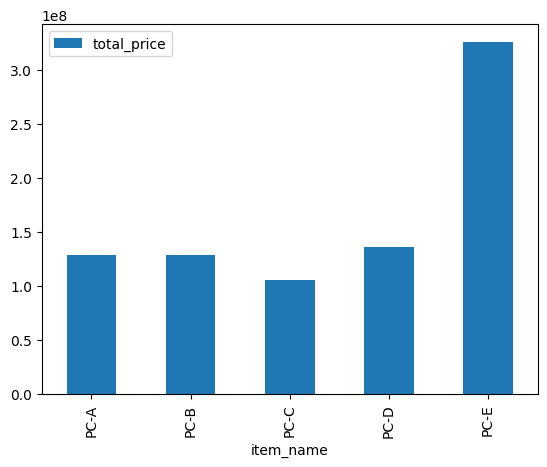

In [107]:
group_data.plot.bar()
# group_data.plot()

In [108]:
pd.pivot_table(
    total_df,
    index = 'payment_month',
    aggfunc = ['sum', 'mean', 'min', 'max', 'std'],
    values = 'total_price'
)

,sum,mean,min,max,std
,total_price,total_price,total_price,total_price,total_price
payment_month,,,,,
02-2019,136905000,137592.964824,50000,420000,68848.024325
03-2019,135695000,135154.382470,50000,420000,69144.112878
04-2019,135970000,136106.106106,50000,420000,69473.778972
05-2019,132750000,133551.307847,50000,420000,68905.731855
06-2019,138870000,135747.800587,50000,420000,67480.539578
07-2019,145850000,138377.609108,50000,420000,68827.693467
